# "Pre-lecture" HW

## Question 1

- The "standard deviation" is a measure of the amount of variation of the values of a distribution about its mean. The higher the standard deviation is, the wider range the values of a distribution spreads.
- The "standard error of the mean" is the standard deviation of a sample mean distribution. In the case of distribution bootsstrapped means, we follow the bootstrapped procedure and have a sample mean distribution after the simulations. The "standard error of the mean" is the standard deviation of the sample mean distribution.

- Both of the standard deviation and the standard error of the mean show the variation of a distribution. However, the standard deviation is focused on the population distribution, while the standard error of the mean is focused on the sample mean distribution.

## Question 2

To create a 95% Confidence Interval, we have sample mean plus or minus about 2 times the standard error, the range we have is the confidence interval we have. 
The reason we have the range "plus or minus about 2 times the standard error" is that if we want to have 95% of the data in the range on both side of the sample mean, we should plus or minus 2 times the standard deviation of the sample mean distribution, which is plus or minus 2 times the standard error.

## Question 3

To create a 95% bootstrapped confidence interval, we have the range between 2.5th percentile and the 97.5th percentile. The reason why we use this method is because the boosstrapped distribution is not neccesarily normally distributed, such that we cannot use "plus or minus 2 times the standard error from the mean". Therefore, we take the middle 95% of the bootstrapped smaple means to create a 95% confidence interval.

## Question 4

- In this question, I asked ChatGPT to create a dataset.

95% bootstrap confidence interval for a population mean

95% Bootstrap Confidence Interval: [45.97, 54.29]


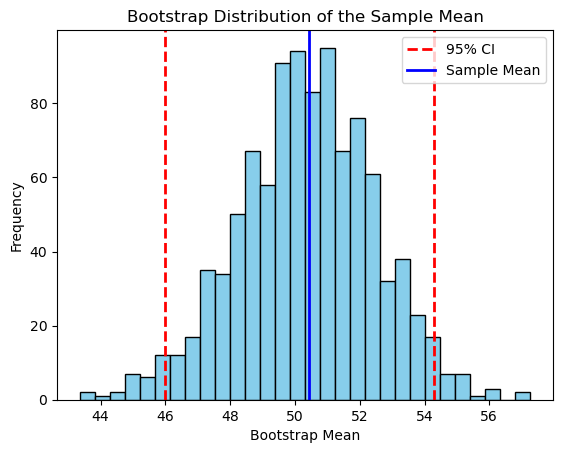

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(123)
sample_data = np.random.normal(loc=50, scale=10, size=30)
sample_mean = np.mean(sample_data)

# Bootstrap
n_bootstrap = 1000
bootstrap_means = [np.mean(np.random.choice(sample_data, size=len(sample_data), replace=True)) for _ in range(n_bootstrap)]

# 95% Confidence Interval
lower_ci = np.percentile(bootstrap_means, 2.5)
upper_ci = np.percentile(bootstrap_means, 97.5)
print(f"95% Bootstrap Confidence Interval: [{lower_ci:.2f}, {upper_ci:.2f}]")

# Visualization
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(lower_ci, color='red', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(upper_ci, color='red', linestyle='dashed', linewidth=2)
plt.axvline(sample_mean, color='blue', linestyle='solid', linewidth=2, label='Sample Mean')
plt.title('Bootstrap Distribution of the Sample Mean')
plt.xlabel('Bootstrap Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


95% bootstrap confidence interval for population median

95% Bootstrap Confidence Interval for Median: [43.61, 58.22]


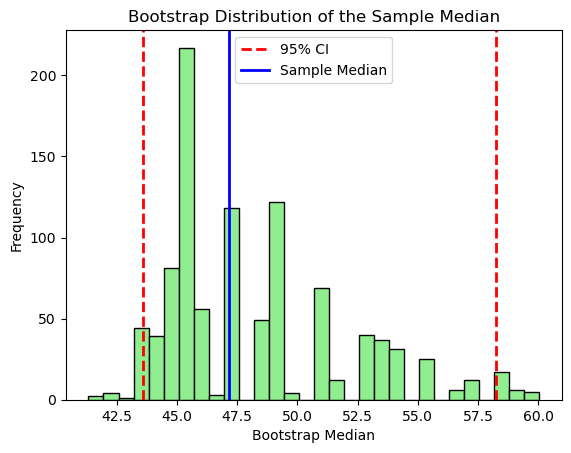

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(123)
sample_data = np.random.normal(loc=50, scale=10, size=30)
sample_median = np.median(sample_data)

# Bootstrap
n_bootstrap = 1000
bootstrap_medians = [np.median(np.random.choice(sample_data, size=len(sample_data), replace=True)) for _ in range(n_bootstrap)]

# 95% Confidence Interval
lower_ci = np.percentile(bootstrap_medians, 2.5)
upper_ci = np.percentile(bootstrap_medians, 97.5)
print(f"95% Bootstrap Confidence Interval for Median: [{lower_ci:.2f}, {upper_ci:.2f}]")

# Visualization
plt.hist(bootstrap_medians, bins=30, color='lightgreen', edgecolor='black')
plt.axvline(lower_ci, color='red', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(upper_ci, color='red', linestyle='dashed', linewidth=2)
plt.axvline(sample_median, color='blue', linestyle='solid', linewidth=2, label='Sample Median')
plt.title('Bootstrap Distribution of the Sample Median')
plt.xlabel('Bootstrap Median')
plt.ylabel('Frequency')
plt.legend()
plt.show()


- In the first case, we create 95% bootstrap confidence interval for a population mean, while in the second case, we create 95% bootstrap confidence interval for a population median. The logrithm for both code are the same (made bootstrap process for 1000 times and get distribution for sample mean/sample median, then take the range between 2.5th percentile and the 97.5th percentile as the 95% confidence interval for both case). Only thing we need to do is to adjust the statistic function and updating relavants part.

# "Post-lecture" HW

## Question 5

Population parameter (like population mean) is a fixed value which we usually don't know the exact value. However, sample statistic (like sample mean) is a value based on the sample, which we can calculated. Based on the sample statistic, we can have a sample distribution, which helps us to create a confidence interval to estimate the population parameter.

## Question 6

### 1. What is the process of bootstrapping?
   Step 1: Produce a original sample with n elements. 
   Step 2: Randomly select data from the sample for n times and allowing for duplicates (sample with replacement). Selecte the n values for a new dataset.
   Step 3: Calculate something with the new dataset (sample mean, sample standard deviation, etc.)
   Step 4: Keep track of that calculation result
   Step 5: Repeat steps 2 through 4 a bunch of times to prodece a distribution for sample statistics.
   
### 2. What is the main purpose of bootstrapping?
   The main purpose of bootstrapping is to create confidence interval for population parameter (like population mean, median, etc.) Also it can help to apply hypothesis testing.
   
### 3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
   Using bootstrapping, we can create a 95% confidence interval for population mean. If the population mean we were guessing is in the 95% confidence interval, we failed to reject the null hypothesis guess, otherwise, we reject the hypothesis test.

## Question 7

In the case from "pre-lecture" video, the null hypothesis is μ=0, which represents the drug is not doing anything. The alternative hypothesis is that μ>0, which represents that the drug can make the patients feel better. By the 95% confidence interval we create by bootstrapping, we have 0 is in the confidence interval. Therefore, it suggests that te sample data is consistent with the null hypothesis, hence we fail to reject the null hypothesis and reject the alternative hypothesis, such that we suggest that the drug is not doing anything.

## Question 8

- In this case, I'm going to figure out whether or not the vaccine is effective by comparing the difference between final health score and the initial health score,

- In the sample, we calculate the difference between the initial health score and the final health score for each patient.

In [2]:
import csv
import requests

# Step 1: Define the CSV URL
csv_url = "https://gist.githubusercontent.com/Laney0110/617d8833963e7ef92fc6070120f30aa6/raw/9a0b9e0ac31d04765524d0d22267ed3c8df93542/patient_health_scores.csv"

# Step 2: Download the CSV content
try:
    response = requests.get(csv_url)
    response.raise_for_status()  # Check for HTTP errors
    print("CSV file successfully downloaded.\n")
except Exception as e:
    print(f"Error downloading the CSV file: {e}")
    exit()

# Step 3: Decode and parse the CSV content
decoded_content = response.content.decode('utf-8').splitlines()
reader = csv.DictReader(decoded_content)

# Step 4: Calculate Health Score Differences
health_score_diff_list = []
for row in reader:
    try:
        initial = float(row['InitialHealthScore'])
        final = float(row['FinalHealthScore'])
        difference = final - initial
        health_score_diff_list.append(difference)
    except ValueError as ve:
        print(f"Error parsing numerical values in row: {row}")
    except KeyError as ke:
        print(f"Missing expected column in row: {row}")

# Step 5: Display the list of differences
print("Health Score Differences:")
print(health_score_diff_list)


CSV file successfully downloaded.

Health Score Differences:
[2.0, 8.0, -3.0, 5.0, 3.0, 6.0, 7.0, -3.0, 7.0, 1.0]


### Making a hypothesis test on the mean for population health score differences:
    μ denote as the the mean for population health score differences
    Null hypothesis: μ=0, the vaccine is not effective
    Alternative hypothesis: μ>0, the vaccine is effective
    
### With the help of ChatGPT, we have the code to perform bootstrapping (10000 iterations) to generate a distribution of sample means for population health score differences.

Original Mean Difference: 3.30
Bootstrap Mean of Means: 3.31
Bootstrap Standard Deviation: 1.2072


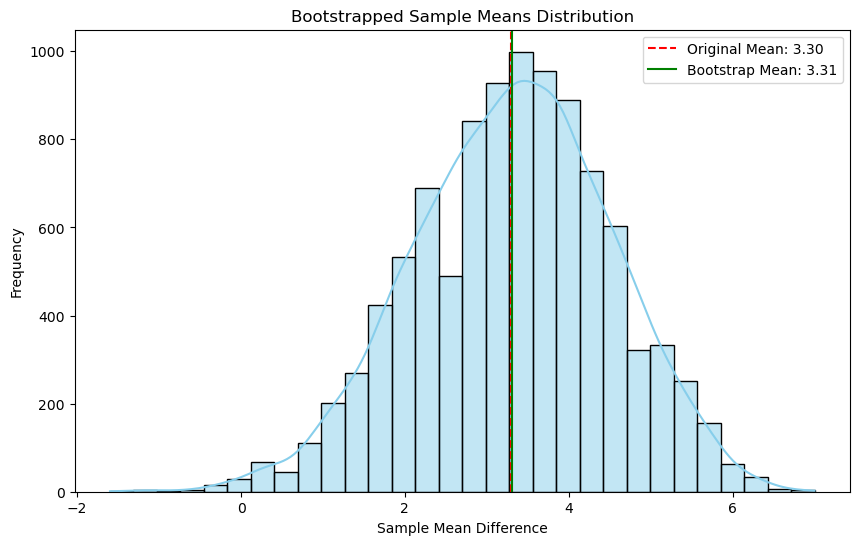


95% Confidence Interval for the Mean Difference: (0.90, 5.60)


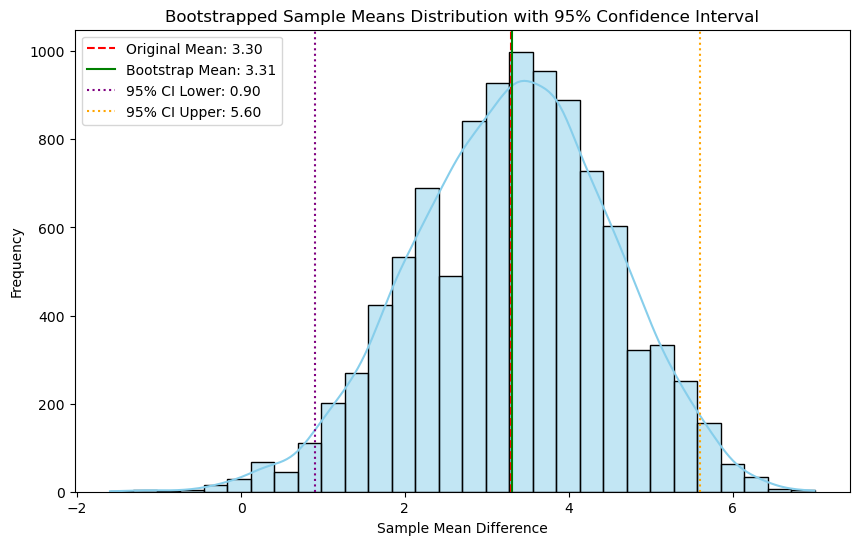

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of Health Score Differences
health_score_diff_list = [2, 8, -3, 5, 3, 6, 7, -3, 7, 1]

# Convert the list to a NumPy array for efficiency
health_diffs = np.array(health_score_diff_list)

# Set random seed for reproducibility
np.random.seed(42)

def bootstrap_means(data, num_iterations=10000):
    """
    Perform bootstrapping to generate a distribution of sample means.

    Parameters:
    - data (np.ndarray): Array of data points.
    - num_iterations (int): Number of bootstrap samples.

    Returns:
    - bootstrap_means (np.ndarray): Array of bootstrap sample means.
    """
    n = len(data)
    # Generate random indices for resampling
    random_indices = np.random.randint(0, n, size=(num_iterations, n))
    # Resample data using the random indices
    resampled_data = data[random_indices]
    # Calculate means of each resampled dataset
    bootstrap_means = resampled_data.mean(axis=1)
    return bootstrap_means

def calculate_confidence_interval(bootstrap_means, confidence_level=0.95):
    """
    Calculate the confidence interval from bootstrap sample means.

    Parameters:
    - bootstrap_means (np.ndarray): Array of bootstrap sample means.
    - confidence_level (float): Confidence level for the interval.

    Returns:
    - (ci_lower, ci_upper): Tuple containing the lower and upper bounds of the confidence interval.
    """
    lower_percentile = ((1.0 - confidence_level) / 2.0) * 100
    upper_percentile = (confidence_level + ((1.0 - confidence_level) / 2.0)) * 100
    ci_lower = np.percentile(bootstrap_means, lower_percentile)
    ci_upper = np.percentile(bootstrap_means, upper_percentile)
    return ci_lower, ci_upper

# Perform bootstrapping
num_iterations = 10000
bootstrap_means_distribution = bootstrap_means(health_diffs, num_iterations)

# Display basic statistics
original_mean = health_diffs.mean()
bootstrap_mean = bootstrap_means_distribution.mean()
bootstrap_std = bootstrap_means_distribution.std()

print(f"Original Mean Difference: {original_mean:.2f}")
print(f"Bootstrap Mean of Means: {bootstrap_mean:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std:.4f}")

# Visualize the bootstrap means distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means_distribution, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.axvline(original_mean, color='red', linestyle='--', label=f'Original Mean: {original_mean:.2f}')
plt.axvline(bootstrap_mean, color='green', linestyle='-', label=f'Bootstrap Mean: {bootstrap_mean:.2f}')
plt.title('Bootstrapped Sample Means Distribution')
plt.xlabel('Sample Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate 95% confidence interval
confidence_level = 0.95
ci_lower, ci_upper = calculate_confidence_interval(bootstrap_means_distribution, confidence_level)

print(f"\n{int(confidence_level*100)}% Confidence Interval for the Mean Difference: ({ci_lower:.2f}, {ci_upper:.2f})")

# Plot with confidence interval
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means_distribution, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.axvline(original_mean, color='red', linestyle='--', label=f'Original Mean: {original_mean:.2f}')
plt.axvline(bootstrap_mean, color='green', linestyle='-', label=f'Bootstrap Mean: {bootstrap_mean:.2f}')
plt.axvline(ci_lower, color='purple', linestyle=':', label=f'95% CI Lower: {ci_lower:.2f}')
plt.axvline(ci_upper, color='orange', linestyle=':', label=f'95% CI Upper: {ci_upper:.2f}')
plt.title('Bootstrapped Sample Means Distribution with 95% Confidence Interval')
plt.xlabel('Sample Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Running the python code, we have bootstrapped sample mean distribution with 95% confidence interval. The 95% Confidence Interval for the Mean Difference is (0.90, 5.60), such that 0 is not conclude in the range, hence, we have evidence to reject the null hypothesis and accept the alternative hypothesis. Therefore, we can conclude that the vaccine is effective for the patients.

## Links for ChatGPT
https://chatgpt.com/share/66fcb449-ed9c-800b-8d81-49c2e4f554a0

https://chatgpt.com/share/66fcb477-a958-800b-a672-1eb6de801759

https://chatgpt.com/share/66fcb485-0f64-800b-83c5-37d8809d91e7

https://chatgpt.com/share/66fcb433-8fac-800b-a958-07037f766eac